In [ ]:
import os
os.getcwd()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline  

# Load the image
image_path = "Images/coins2.jpeg"  # Ensure the correct path to your image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection ----------
def detect_coins_canny(gray_img):
    edges = cv2.Canny(gray_img, 100, 200)  # Apply Canny edge detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_canny = image.copy()
    cv2.drawContours(result_canny, contours, -1, (0, 255, 255), 2)  # pure Yellow contours
    return edges, result_canny

# ---------- Method 2: Marr-Hildreth (LoG) Edge Detection ----------
def detect_coins_marr_hildreth(gray_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)  # Apply Gaussian Blur
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)  # Apply Laplacian
    edges = np.uint8(np.abs(laplacian))  # Convert to uint8 format

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_mh = image.copy()
    cv2.drawContours(result_mh, contours, -1, (0, 0, 255), 2)  # Red contours,since openCV follows BGR 
    return edges, result_mh

# Run both methods
edges_canny, outlined_canny = detect_coins_canny(gray)
edges_mh, outlined_mh = detect_coins_marr_hildreth(gray)

# ---------- Display Results ----------
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(edges_canny, cmap="gray")
axs[0, 0].set_title("Canny Edge Detection")

axs[0, 1].imshow(cv2.cvtColor(outlined_canny, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Coins Outlined - Canny")

axs[1, 0].imshow(edges_mh, cmap="gray")
axs[1, 0].set_title("Marr-Hildreth (LoG) Edge Detection")

axs[1, 1].imshow(cv2.cvtColor(outlined_mh, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Coins Outlined - Marr-Hildreth")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


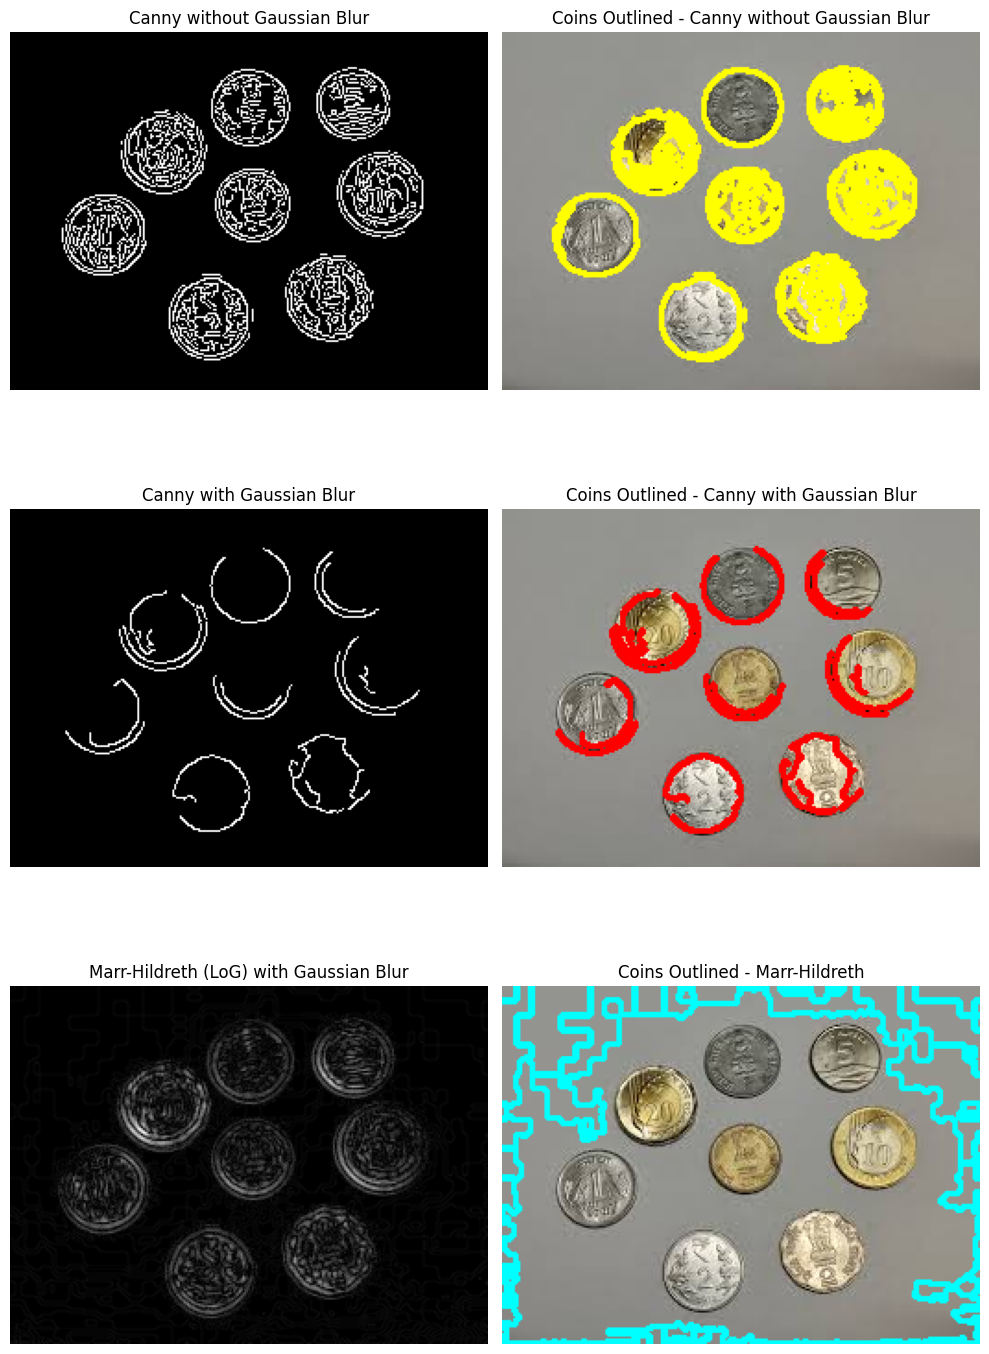

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection without Gaussian Blur ----------
def detect_coins_canny_no_blur(gray_img, orig_img):
    edges = cv2.Canny(gray_img, 100, 200)  # Apply Canny edge detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_canny = orig_img.copy()
    cv2.drawContours(result_canny, contours, -1, (0, 255, 255), 2)  # Yellow contours
    return edges, result_canny

# ---------- Method 2: Canny Edge Detection with Gaussian Blur ----------
def detect_coins_canny_blur(gray_img, orig_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)  # Apply Gaussian Blur
    edges = cv2.Canny(blurred, 100, 200)  # Apply Canny edge detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_canny = orig_img.copy()
    cv2.drawContours(result_canny, contours, -1, (0, 0, 255), 2)  # Red contours
    return edges, result_canny

# ---------- Method 3: Marr-Hildreth (LoG) Edge Detection with Gaussian Blur ----------
def detect_coins_marr_hildreth(gray_img, orig_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)  # Apply Gaussian Blur
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)  # Apply Laplacian
    edges = np.uint8(np.abs(laplacian))  # Convert to uint8 format

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_mh = orig_img.copy()
    cv2.drawContours(result_mh, contours, -1, (255, 255, 0), 2)  # Yellow contours
    return edges, result_mh

# Run all methods
edges_canny_no_blur, outlined_canny_no_blur = detect_coins_canny_no_blur(gray, image)
edges_canny_blur, outlined_canny_blur = detect_coins_canny_blur(gray, image)
edges_mh, outlined_mh = detect_coins_marr_hildreth(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# First row: Canny without Gaussian Blur
axs[0, 0].imshow(edges_canny_no_blur, cmap="gray")
axs[0, 0].set_title("Canny without Gaussian Blur")
axs[0, 1].imshow(cv2.cvtColor(outlined_canny_no_blur, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Coins Outlined - Canny without Gaussian Blur")

# Second row: Canny with Gaussian Blur
axs[1, 0].imshow(edges_canny_blur, cmap="gray")
axs[1, 0].set_title("Canny with Gaussian Blur")
axs[1, 1].imshow(cv2.cvtColor(outlined_canny_blur, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Coins Outlined - Canny with Gaussian Blur")

# Third row: Marr-Hildreth with Gaussian Blur
axs[2, 0].imshow(edges_mh, cmap="gray")
axs[2, 0].set_title("Marr-Hildreth (LoG) with Gaussian Blur")
axs[2, 1].imshow(cv2.cvtColor(outlined_mh, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("Coins Outlined - Marr-Hildreth")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


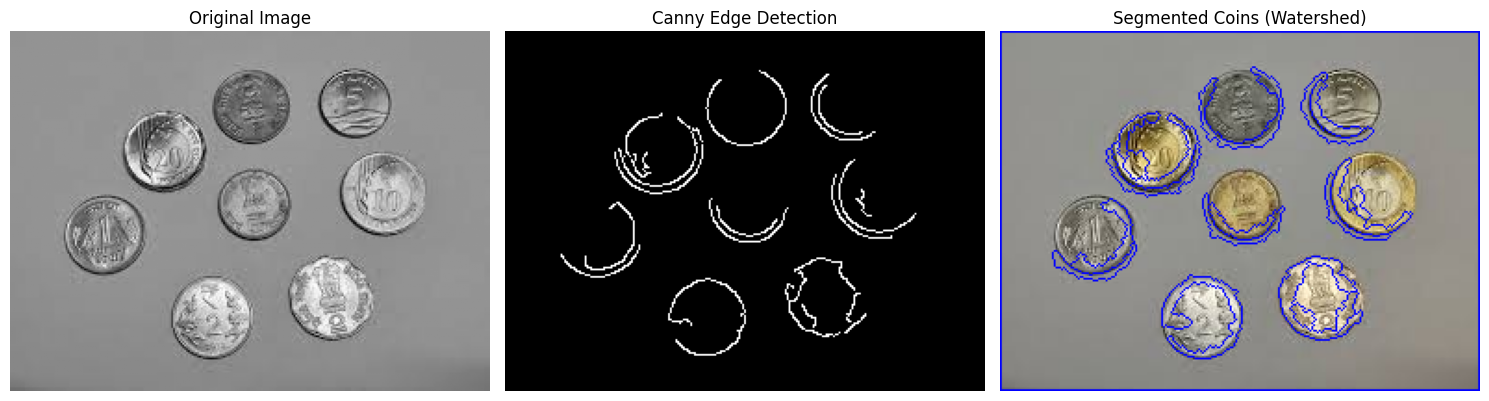

Total number of detected coins: 20


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection with Gaussian Blur ----------
def detect_coins_canny(gray_img, orig_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)  # Apply Gaussian Blur
    edges = cv2.Canny(blurred, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Segmentation Using Watershed Algorithm ----------
def segment_coins_watershed(gray_img, orig_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)
    edges = cv2.Canny(blurred, 100, 200)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    return result_watershed, markers, len(np.unique(markers)) - 2  # Subtracting background and unknown

# Run detection and segmentation
edges_canny = detect_coins_canny(gray, image)
segmented_watershed, markers, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[2].set_title("Segmented Coins (Watershed)")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")


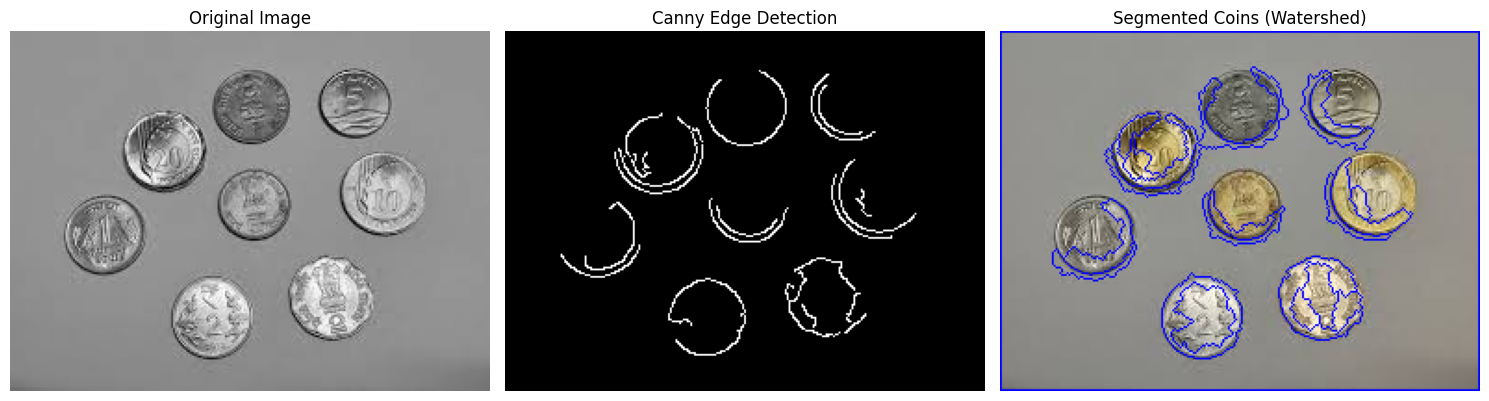

Total number of detected coins: 2


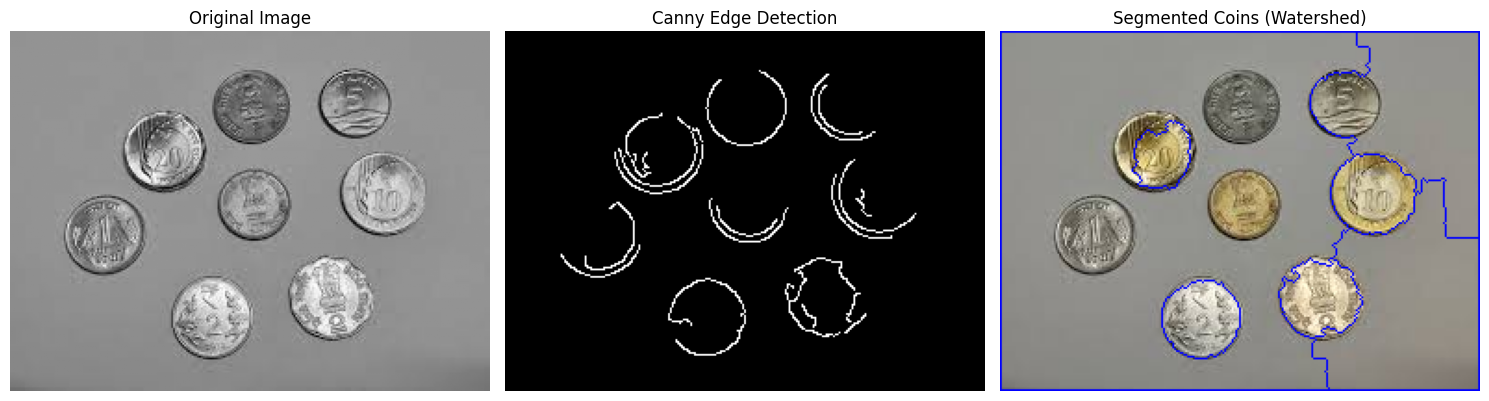

Total number of detected coins: 3


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection with Gaussian Blur ----------
def detect_coins_canny(gray_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)  # Apply Gaussian Blur
    edges = cv2.Canny(blurred, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Segmentation Using Watershed Algorithm ----------
def segment_coins_watershed(gray_img, orig_img):
    blurred = cv2.GaussianBlur(gray_img, (5, 5), 1.5)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Morphological operations to remove noise and fill gaps
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Distance transform to find sure foreground
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    total_coins = len(np.unique(markers)) - 2  # Subtract background and unknown regions
    return result_watershed, markers, total_coins

# Run detection and segmentation
edges_canny = detect_coins_canny(gray)
segmented_watershed, markers, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[2].set_title("Segmented Coins (Watershed)")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")

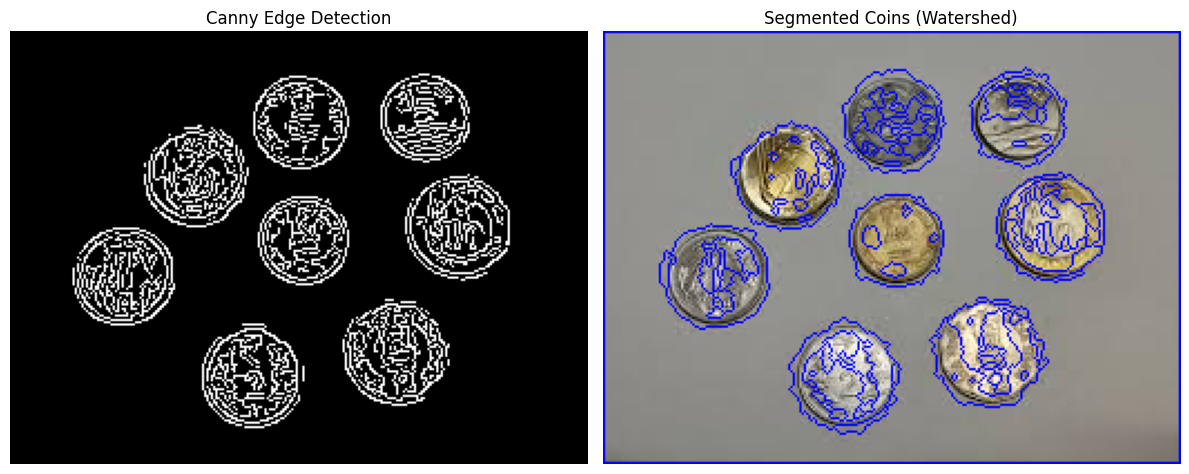

Total number of detected coins: 144


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection WITHOUT Gaussian Blur ----------
def detect_coins_canny(gray_img, orig_img):
    edges = cv2.Canny(gray_img, 100, 200)  # Apply Canny edge detection without Gaussian Blur
    return edges

# ---------- Segmentation Using Watershed Algorithm ----------
def segment_coins_watershed(gray_img, orig_img):
    edges = cv2.Canny(gray_img, 100, 200)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    # Count coins (number of unique markers excluding background)
    total_coins = len(np.unique(markers)) - 2  # Subtracting background and unknown
    
    return result_watershed, markers, total_coins

# Run detection and segmentation
edges_canny = detect_coins_canny(gray, image)
segmented_watershed, markers, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(edges_canny, cmap="gray")
axs[0].set_title("Canny Edge Detection")

axs[1].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[1].set_title("Segmented Coins (Watershed)")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")


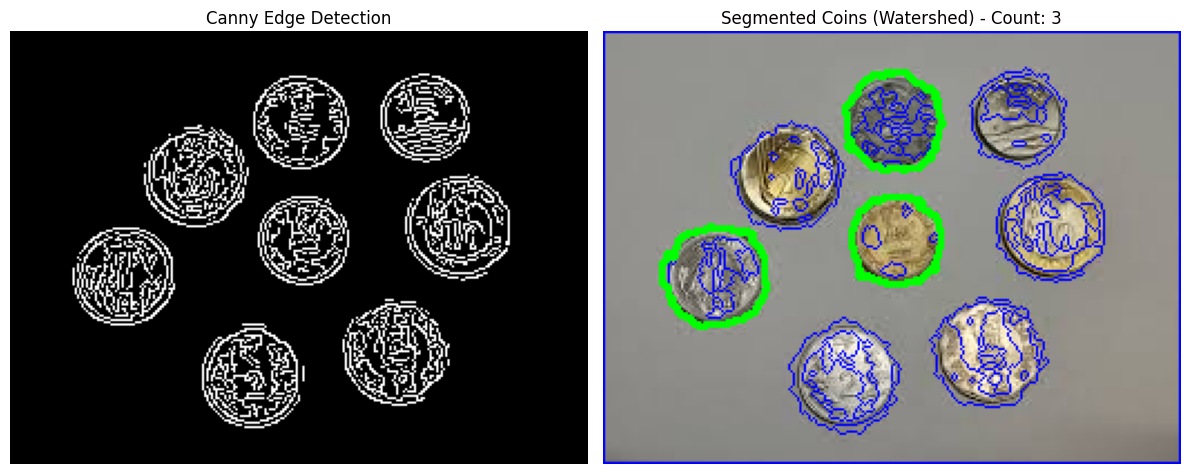

Total number of detected coins: 3


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg" # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Method 1: Canny Edge Detection WITHOUT Gaussian Blur ----------
def detect_coins_canny(gray_img, orig_img):
    edges = cv2.Canny(gray_img, 100, 200)  # Apply Canny edge detection without Gaussian Blur
    return edges

# ---------- Segmentation Using Watershed Algorithm with Circular Filtering ----------
def segment_coins_watershed(gray_img, orig_img):
    edges = cv2.Canny(gray_img, 100, 200)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    # Convert markers into binary mask
    mask = np.zeros_like(gray_img, dtype=np.uint8)
    mask[markers > 1] = 255
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    coin_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Filter small noise
            perimeter = cv2.arcLength(cnt, True)
            circularity = (4 * np.pi * area) / (perimeter * perimeter)
            if 0.7 < circularity < 1.2:  # Check if shape is circular
                coin_count += 1
                cv2.drawContours(result_watershed, [cnt], -1, (0, 255, 0), 2)  # Green contours for detected coins
    
    return result_watershed, coin_count

# Run detection and segmentation
edges_canny = detect_coins_canny(gray, image)
segmented_watershed, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(edges_canny, cmap="gray")
axs[0].set_title("Canny Edge Detection")

axs[1].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Segmented Coins (Watershed) - Count: {total_coins}")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")


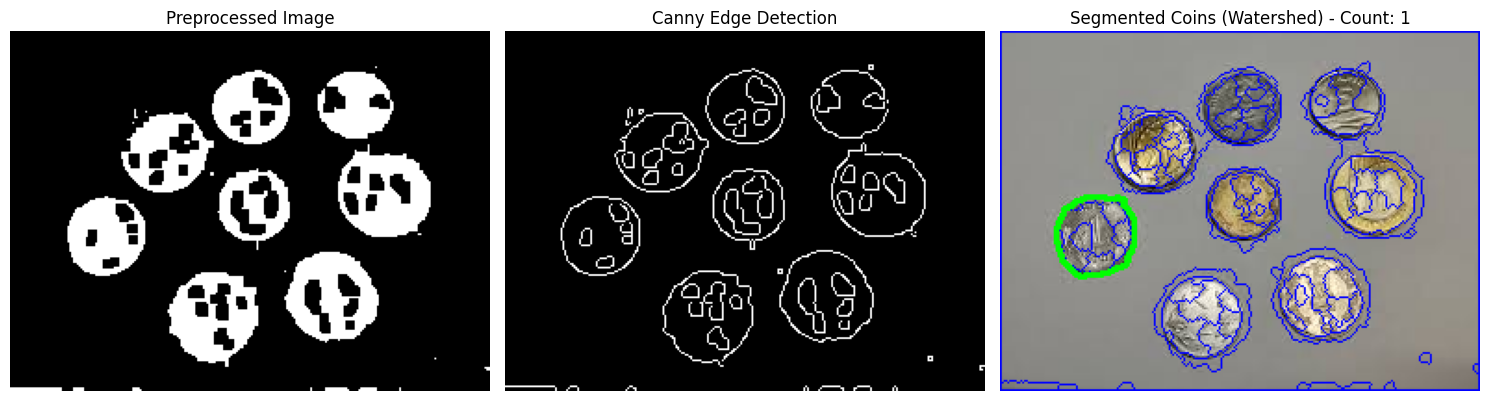

Total number of detected coins: 1


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing: Blur + Morphology ----------
def preprocess_image(gray_img):
    blurred = cv2.medianBlur(gray_img, 5)  # Median blur to remove noise
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Fill small holes
    return closed

# ---------- Method 1: Canny Edge Detection ----------
def detect_coins_canny(preprocessed_img):
    edges = cv2.Canny(preprocessed_img, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Segmentation Using Watershed Algorithm with Circular Filtering ----------
def segment_coins_watershed(gray_img, orig_img):
    preprocessed = preprocess_image(gray_img)
    edges = detect_coins_canny(preprocessed)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    # Convert markers into binary mask
    mask = np.zeros_like(gray_img, dtype=np.uint8)
    mask[markers > 1] = 255
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    coin_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Filter small noise
            perimeter = cv2.arcLength(cnt, True)
            circularity = (4 * np.pi * area) / (perimeter * perimeter)
            if 0.7 < circularity < 1.2:  # Check if shape is circular
                coin_count += 1
                cv2.drawContours(result_watershed, [cnt], -1, (0, 255, 0), 2)  # Green contours for detected coins
    
    return result_watershed, coin_count

# Run detection and segmentation
preprocessed = preprocess_image(gray)
edges_canny = detect_coins_canny(preprocessed)
segmented_watershed, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(preprocessed, cmap="gray")
axs[0].set_title("Preprocessed Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[2].set_title(f"Segmented Coins (Watershed) - Count: {total_coins}")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")

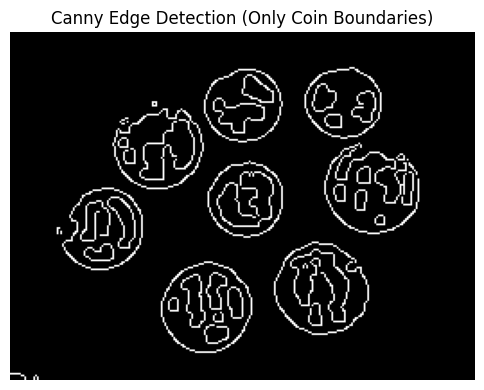

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing to Remove Internal Details ----------
def preprocess_for_boundary_only(gray_img):
    blurred = cv2.GaussianBlur(gray_img, (7, 7), 2)  # Reduce noise and internal textures
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)  # Get better boundaries
    
    # Apply Morphological Closing to fill small gaps inside coins
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    return closing

# ---------- Method 1: Canny Edge Detection WITH Preprocessing ----------
def detect_coins_canny(gray_img, orig_img):
    processed = preprocess_for_boundary_only(gray_img)
    edges = cv2.Canny(processed, 100, 200)  # Apply Canny only on processed image
    
    return edges

# Run detection
edges_canny = detect_coins_canny(gray, image)

# ---------- Display Results ----------
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny, cmap="gray")
plt.title("Canny Edge Detection (Only Coin Boundaries)")
plt.axis("off")
plt.show()


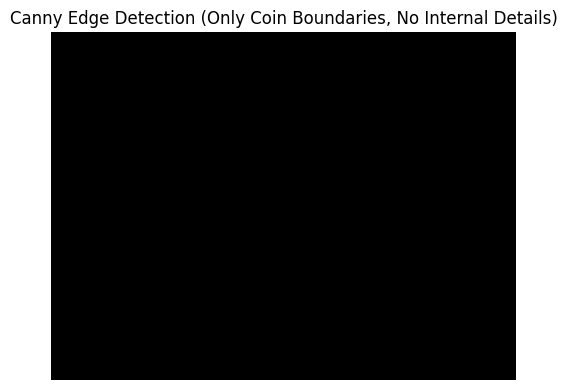

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing to Keep Only Outer Coin Boundaries ----------
def preprocess_to_remove_internal_details(gray_img):
    # Apply strong Gaussian blur to remove textures
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 3)

    # Apply Otsu's thresholding to create a binary mask
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological closing to remove small holes inside coins
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=3)

    # Fill the internal part of coins using Flood Fill
    mask = closed.copy()
    h, w = mask.shape[:2]
    flood_mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(mask, flood_mask, (0, 0), 255)  # Fill background
    mask = cv2.bitwise_not(mask)  # Invert to keep coin regions white

    # Combine with original to keep only coin boundaries
    final = cv2.bitwise_and(closed, mask)

    return final

# ---------- Method: Canny Edge Detection on Processed Image ----------
def detect_coins_canny(gray_img, orig_img):
    processed = preprocess_to_remove_internal_details(gray_img)
    edges = cv2.Canny(processed, 100, 200)  # Apply Canny only on processed image
    
    return edges

# Run detection
edges_canny = detect_coins_canny(gray, image)

# ---------- Display Results ----------
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny, cmap="gray")
plt.title("Canny Edge Detection (Only Coin Boundaries, No Internal Details)")
plt.axis("off")
plt.show()


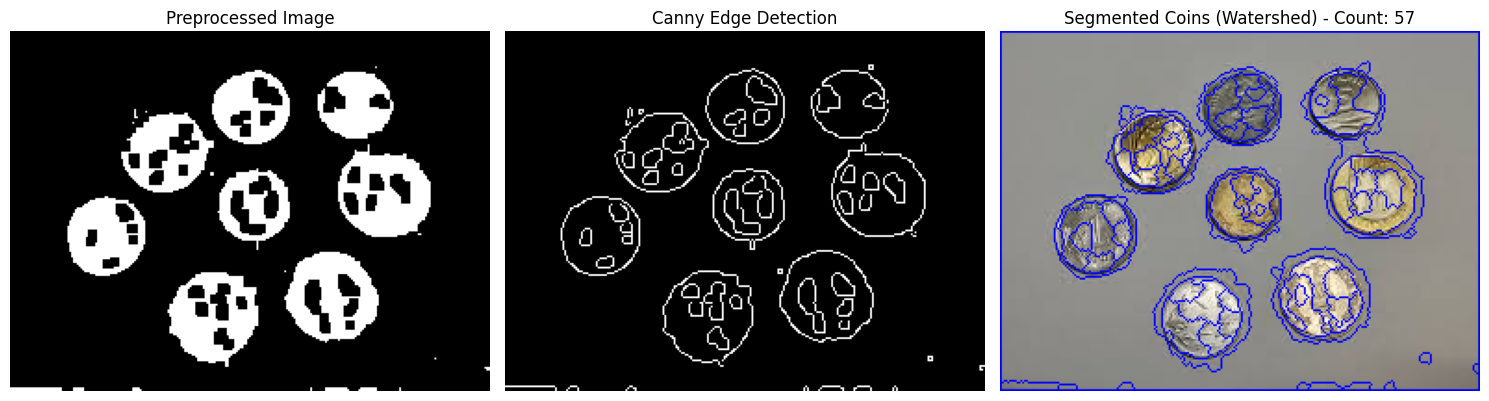

Total number of detected coins: 57


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing: Blur + Morphology ----------
def preprocess_image(gray_img):
    blurred = cv2.medianBlur(gray_img, 5)  # Median blur to remove noise
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Fill small holes
    return closed

# ---------- Method 1: Canny Edge Detection ----------
def detect_coins_canny(preprocessed_img):
    edges = cv2.Canny(preprocessed_img, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Segmentation Using Watershed Algorithm ----------
def segment_coins_watershed(gray_img, orig_img):
    preprocessed = preprocess_image(gray_img)
    edges = detect_coins_canny(preprocessed)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    # Count the number of segmented objects
    unique_markers = np.unique(markers)
    coin_count = len(unique_markers) - 2  # Subtracting background and unknown regions
    
    return result_watershed, coin_count

# Run detection and segmentation
preprocessed = preprocess_image(gray)
edges_canny = detect_coins_canny(preprocessed)
segmented_watershed, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(preprocessed, cmap="gray")
axs[0].set_title("Preprocessed Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[2].set_title(f"Segmented Coins (Watershed) - Count: {total_coins}")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")


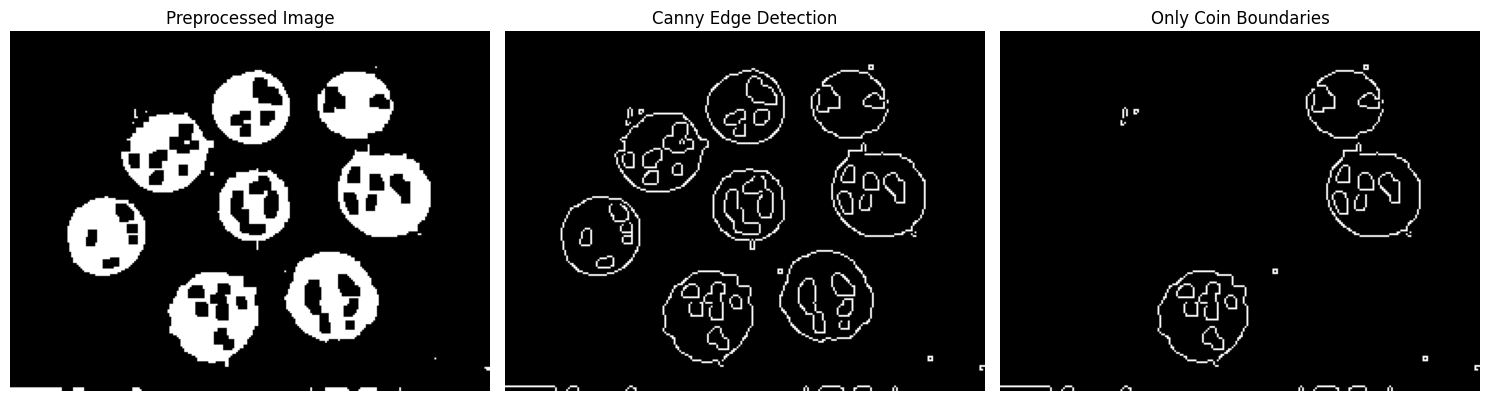

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing: Blur + Morphology ----------
def preprocess_image(gray_img):
    blurred = cv2.medianBlur(gray_img, 5)  # Median blur to remove noise
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Fill small holes
    return closed

# ---------- Method 1: Canny Edge Detection ----------
def detect_coins_canny(preprocessed_img):
    edges = cv2.Canny(preprocessed_img, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Make Inside of Coins Black ----------
def mask_coin_interior(gray_img):
    preprocessed = preprocess_image(gray_img)
    edges = detect_coins_canny(preprocessed)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create mask with filled circles
    mask = np.zeros_like(gray_img)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Filter small noise
            perimeter = cv2.arcLength(cnt, True)
            circularity = (4 * np.pi * area) / (perimeter * perimeter)
            if 0.7 < circularity < 1.2:  # Check if shape is circular
                cv2.drawContours(mask, [cnt], -1, 255, -1)  # Fill inside with white
    
    # Invert mask to keep only edges
    result = cv2.bitwise_and(edges, edges, mask=cv2.bitwise_not(mask))
    return result

# Run detection and masking
preprocessed = preprocess_image(gray)
edges_canny = detect_coins_canny(preprocessed)
masked_coins = mask_coin_interior(gray)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(preprocessed, cmap="gray")
axs[0].set_title("Preprocessed Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(masked_coins, cmap="gray")
axs[2].set_title("Only Coin Boundaries")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


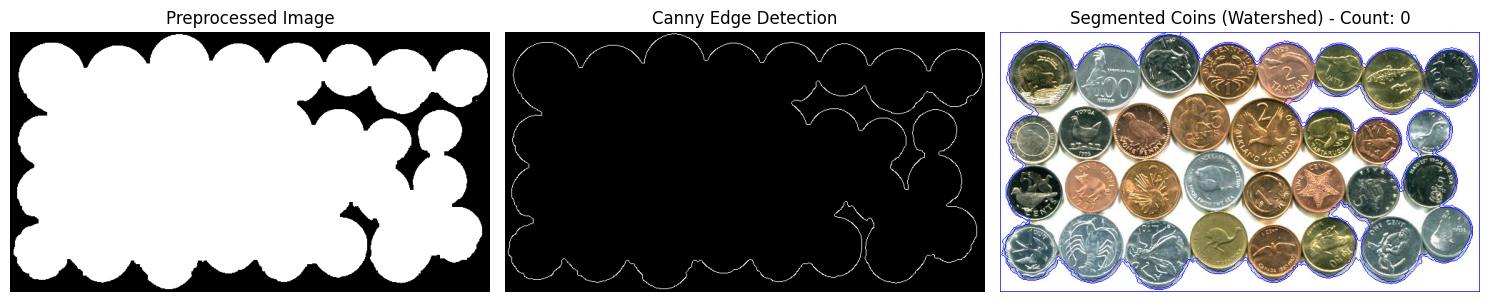

Total number of detected coins: 0


In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins3.jpg"  # Update this path if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------- Preprocessing: Blur + Morphology ----------
def preprocess_image(gray_img):
    blurred = cv2.medianBlur(gray_img, 5)  # Median blur to remove noise
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Fill small holes
    
    # Fill holes inside coins
    filled = closed.copy()
    contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cv2.drawContours(filled, [cnt], -1, 255, thickness=cv2.FILLED)  # Fill the detected coins fully
    
    return filled

# ---------- Method 1: Canny Edge Detection ----------
def detect_coins_canny(preprocessed_img):
    edges = cv2.Canny(preprocessed_img, 100, 200)  # Apply Canny edge detection
    return edges

# ---------- Segmentation Using Watershed Algorithm with Circular Filtering ----------
def segment_coins_watershed(gray_img, orig_img):
    preprocessed = preprocess_image(gray_img)
    edges = detect_coins_canny(preprocessed)
    
    # Finding sure foreground and sure background using distance transform
    dist_transform = cv2.distanceTransform(edges, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Finding unknown region
    sure_bg = cv2.dilate(edges, None, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    result_watershed = orig_img.copy()
    cv2.watershed(result_watershed, markers)
    result_watershed[markers == -1] = [255, 0, 0]  # Red boundary for watershed
    
    # Convert markers into binary mask
    mask = np.zeros_like(gray_img, dtype=np.uint8)
    mask[markers > 1] = 255
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    coin_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Filter small noise
            perimeter = cv2.arcLength(cnt, True)
            circularity = (4 * np.pi * area) / (perimeter * perimeter)
            if 0.7 < circularity < 1.2:  # Check if shape is circular
                coin_count += 1
                cv2.drawContours(result_watershed, [cnt], -1, (0, 255, 0), 2)  # Green contours for detected coins
    
    return result_watershed, coin_count

# Run detection and segmentation
preprocessed = preprocess_image(gray)
edges_canny = detect_coins_canny(preprocessed)
segmented_watershed, total_coins = segment_coins_watershed(gray, image)

# ---------- Display Results ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(preprocessed, cmap="gray")
axs[0].set_title("Preprocessed Image")

axs[1].imshow(edges_canny, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(segmented_watershed, cv2.COLOR_BGR2RGB))
axs[2].set_title(f"Segmented Coins (Watershed) - Count: {total_coins}")

for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {total_coins}")


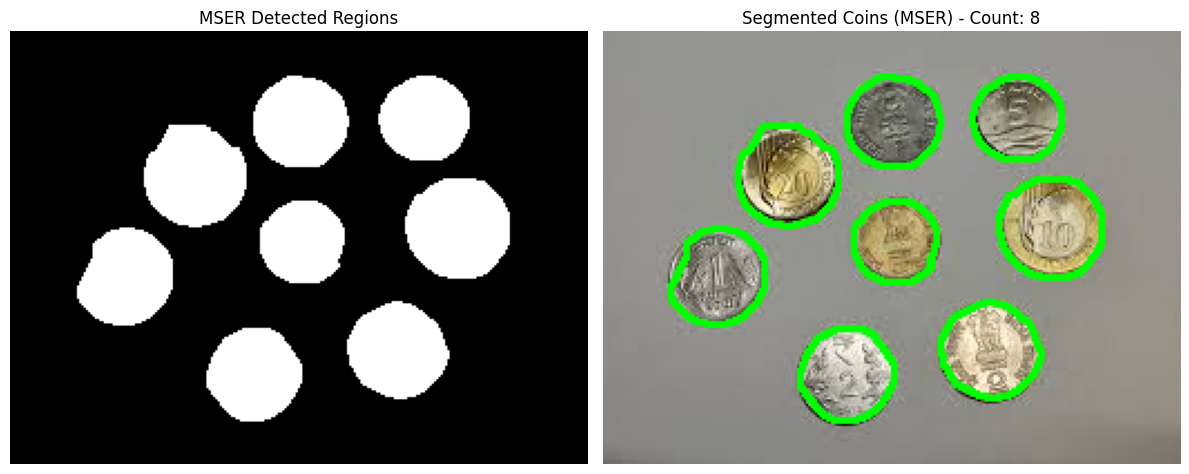

Total number of detected coins: 8


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize MSER detector
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

# Create a mask for detected regions
mask = np.zeros_like(gray, dtype=np.uint8)
for p in regions:
    hull = cv2.convexHull(p.reshape(-1, 1, 2))
    cv2.fillPoly(mask, [hull], 255)

# Find contours from the MSER mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter circular contours and count coins
coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Filter small regions
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)  # Green contour

# Display Results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(mask, cmap="gray")
axs[0].set_title("MSER Detected Regions")
axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Segmented Coins (MSER) - Count: {coin_count}")
for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")


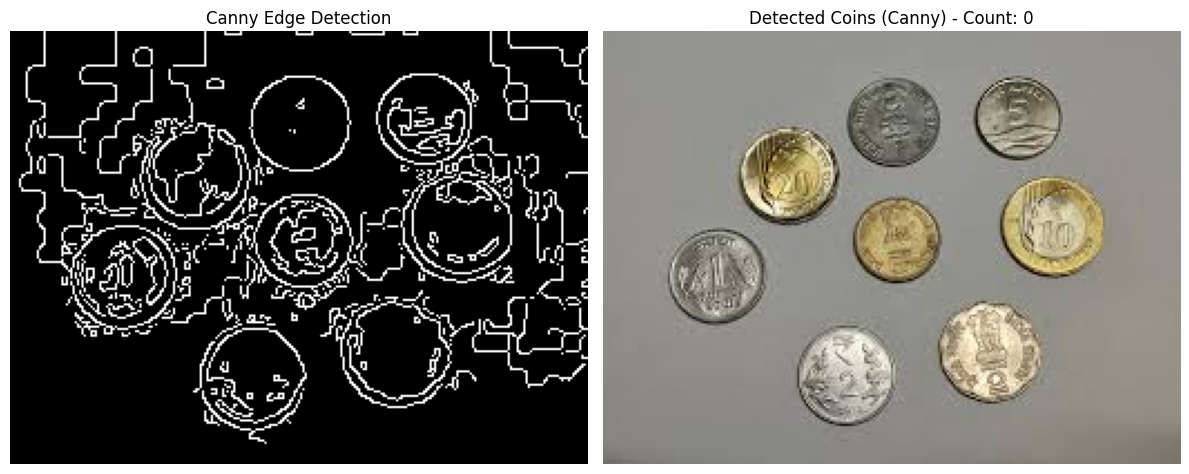

Total number of detected coins: 0


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "Images/coins2.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing: Remove noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Reduce noise
equalized = cv2.equalizeHist(blurred)  # Improve contrast
edges = cv2.Canny(equalized, 50, 150)  # Apply Canny Edge Detection

# Morphological closing to connect broken edges
kernel = np.ones((5, 5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter circular contours
coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Ignore small noise
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider only circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)  # Draw detected coins

# Display results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(edges, cmap="gray")
axs[0].set_title("Canny Edge Detection")
axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Detected Coins (Canny) - Count: {coin_count}")
for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")


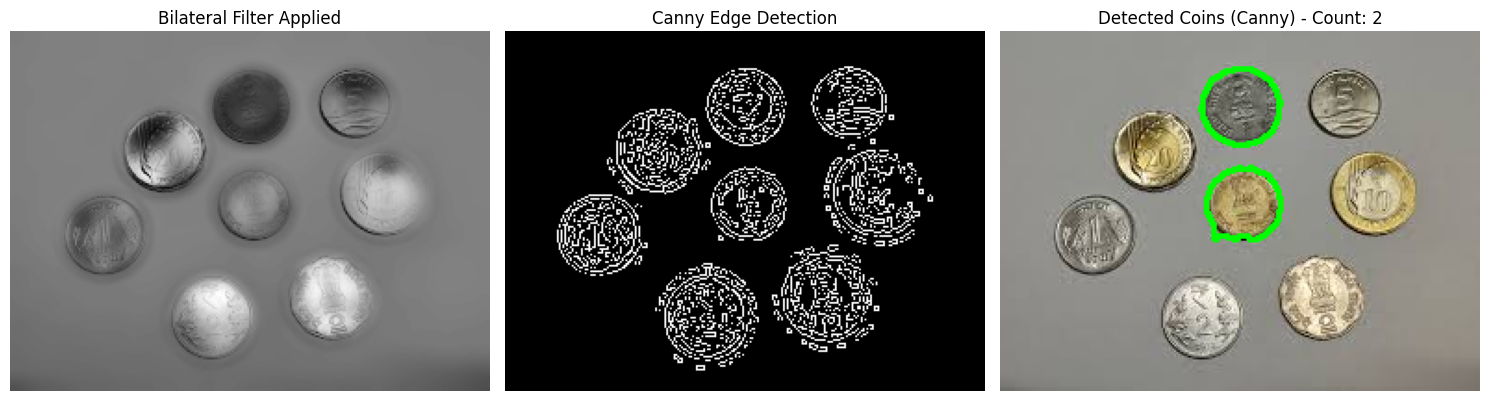

Total number of detected coins: 2


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "Images/coins2.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Preprocessing - Reduce Noise & Improve Edge Detection**
bilateral = cv2.bilateralFilter(gray, 15, 75, 75)  # Bilateral filter for noise reduction
adaptive_thresh = cv2.adaptiveThreshold(
    bilateral, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# **2. Apply Canny Edge Detection**
edges = cv2.Canny(adaptive_thresh, 50, 150)

# **3. Morphological Closing to Close Broken Edges**
kernel = np.ones((5, 5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# **4. Find Contours & Filter Circular Shapes**
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Ignore small regions
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider only circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)

# **5. Display Results**
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(bilateral, cmap="gray")
axs[0].set_title("Bilateral Filter Applied")

axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[2].set_title(f"Detected Coins (Canny) - Count: {coin_count}")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")


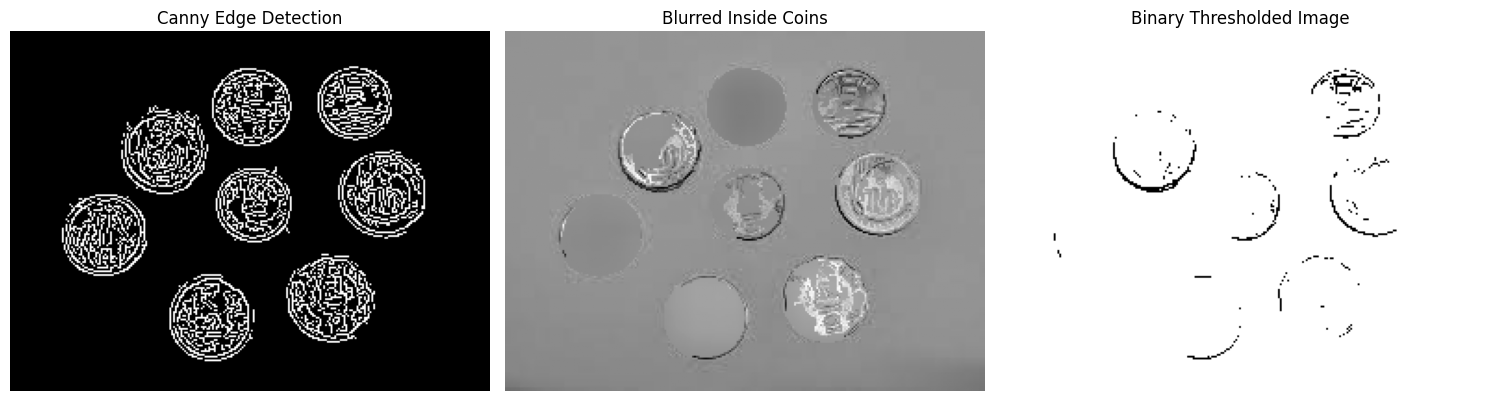

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "Images/coins2.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Apply Canny Edge Detection Normally**
edges = cv2.Canny(gray, 50, 150)

# **2. Find Contours from Canny Edges**
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **3. Blur Only Inside the Contours**
blurred_image = gray.copy()
for cnt in contours:
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)  # Fill contour
    blurred = cv2.GaussianBlur(gray, (51, 51), 50)  # Heavy blur inside
    blurred_image = np.where(mask == 255, blurred, blurred_image)  # Apply blur only inside

# **4. Apply Binary Thresholding**
_, binary_result = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

# **5. Display Results**
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(edges, cmap="gray")
axs[0].set_title("Canny Edge Detection")

axs[1].imshow(blurred_image, cmap="gray")
axs[1].set_title("Blurred Inside Coins")

axs[2].imshow(binary_result, cmap="gray")
axs[2].set_title("Binary Thresholded Image")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()


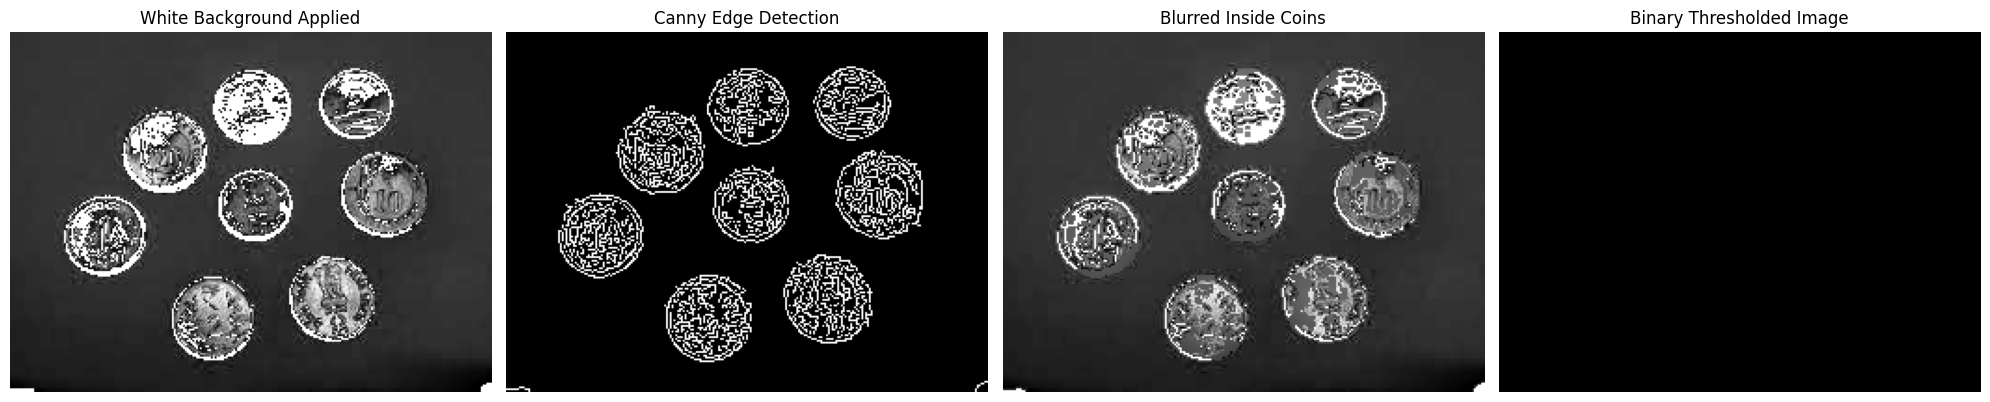

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "Images/coins2.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Convert Background to White**
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the image to get a mask for the background
background_mask = cv2.bitwise_not(binary)

# Replace the background with white
white_background = np.full_like(gray, 255)  # Create a white canvas
gray_with_white_bg = np.where(background_mask == 255, white_background, gray)

# **2. Apply Canny Edge Detection**
edges = cv2.Canny(gray_with_white_bg, 50, 150)

# **3. Find Contours from Canny Edges**
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **4. Blur Only Inside the Contours**
blurred_image = gray_with_white_bg.copy()
for cnt in contours:
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)  # Fill contour
    blurred = cv2.GaussianBlur(gray_with_white_bg, (51, 51), 50)  # Heavy blur inside
    blurred_image = np.where(mask == 255, blurred, blurred_image)  # Apply blur only inside

# **5. Apply Binary Thresholding**
_, binary_result = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

# **6. Display Results**
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(gray_with_white_bg, cmap="gray")
axs[0].set_title("White Background Applied")

axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Canny Edge Detection")

axs[2].imshow(blurred_image, cmap="gray")
axs[2].set_title("Blurred Inside Coins")

axs[3].imshow(binary_result, cmap="gray")
axs[3].set_title("Binary Thresholded Image")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()


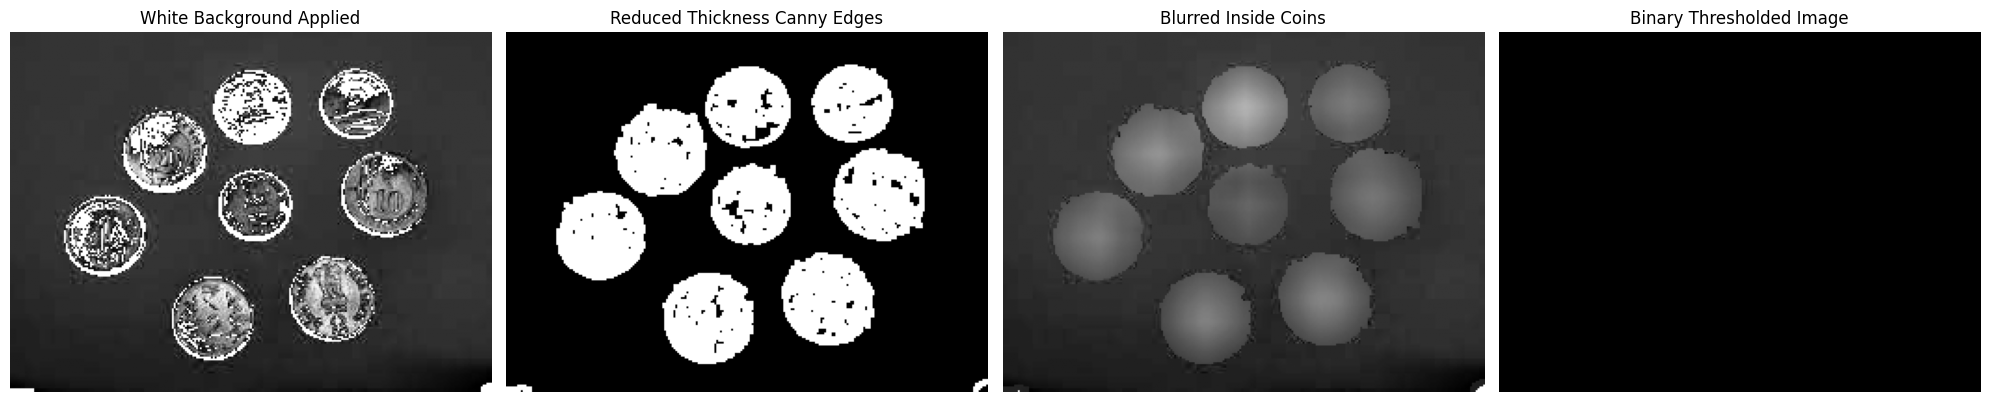

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "Images/coins2.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Convert Background to White**
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
background_mask = cv2.bitwise_not(binary)
white_background = np.full_like(gray, 255)
gray_with_white_bg = np.where(background_mask == 255, white_background, gray)

# **2. Apply Canny Edge Detection**
edges = cv2.Canny(gray_with_white_bg, 50, 150)

# **3. Slightly Thicker Canny Edges (Less Overlap)**
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel
thick_edges = cv2.dilate(edges, kernel, iterations=1)  # Only 1 iteration

# **4. Find Contours from Thick Edges**
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **5. Blur Inside the Coins**
blurred_image = gray_with_white_bg.copy()
for cnt in contours:
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)  # Fill contour
    blurred = cv2.GaussianBlur(gray_with_white_bg, (41, 41), 30)  # Slightly lower blur
    blurred_image = np.where(mask == 255, blurred, blurred_image)  # Apply blur only inside

# **6. Apply Binary Thresholding**
_, binary_result = cv2.threshold(blurred_image, 1, 255, cv2.THRESH_BINARY)

# **7. Display Results**
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(gray_with_white_bg, cmap="gray")
axs[0].set_title("White Background Applied")

axs[1].imshow(thick_edges, cmap="gray")
axs[1].set_title("Reduced Thickness Canny Edges")

axs[2].imshow(blurred_image, cmap="gray")
axs[2].set_title("Blurred Inside Coins")

axs[3].imshow(binary_result, cmap="gray")
axs[3].set_title("Binary Thresholded Image")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()


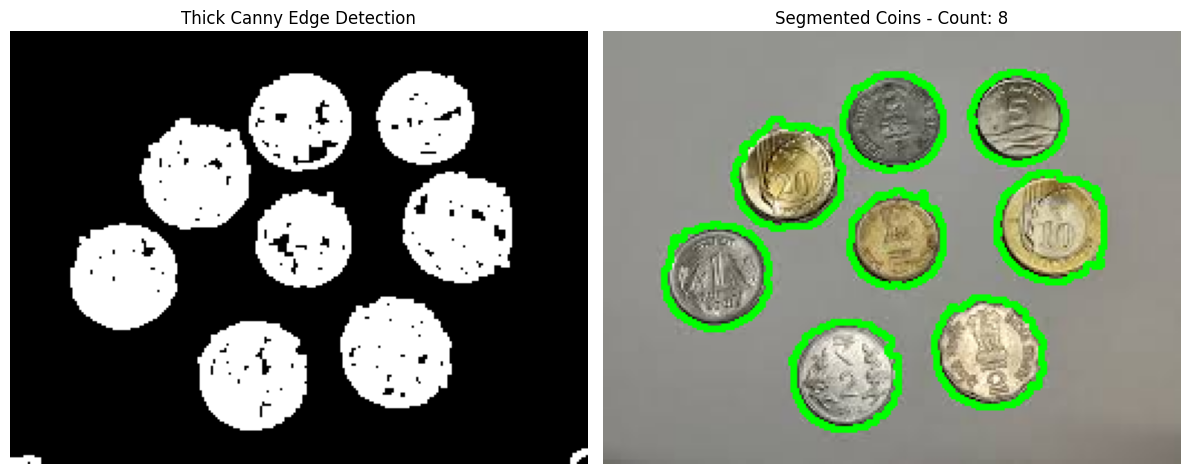

Total number of detected coins: 8


In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Convert Background to White**
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
background_mask = cv2.bitwise_not(binary)
white_background = np.full_like(gray, 255)
gray_with_white_bg = np.where(background_mask == 255, white_background, gray)

# **2. Apply Canny Edge Detection**
edges = cv2.Canny(gray_with_white_bg, 50, 150)

# **3. Slightly Thicker Canny Edges (Less Overlap)**
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel
thick_edges = cv2.dilate(edges, kernel, iterations=1)  # Only 1 iteration

# **4. Find Contours from Thick Edges**
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **5. Filter Circular Contours and Count Coins**
coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Filter small regions
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)  # Green contour

# **6. Display Results**
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(thick_edges, cmap="gray")
axs[0].set_title("Thick Canny Edge Detection")
axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Segmented Coins - Count: {coin_count}")
for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")

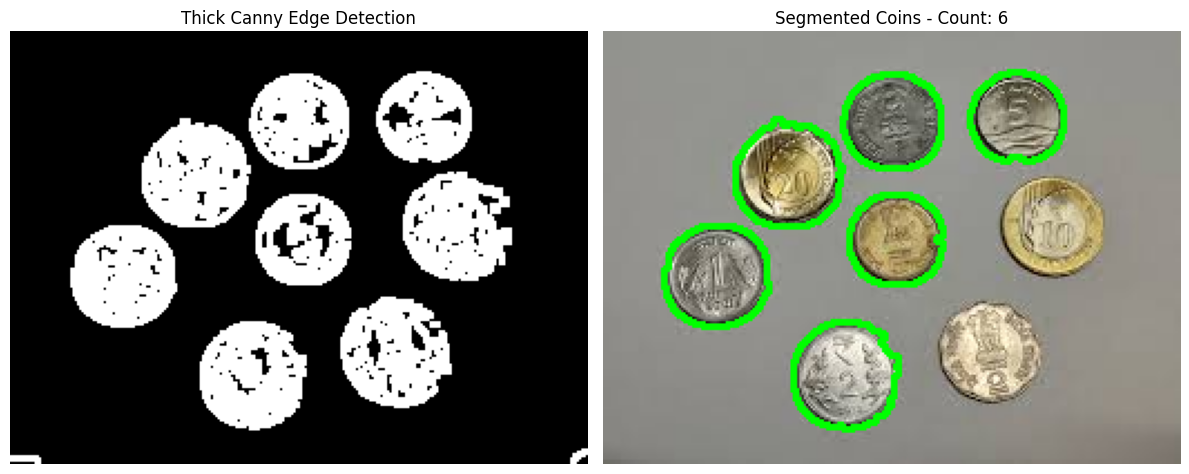

Total number of detected coins: 6


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Convert Background to White**
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
background_mask = cv2.bitwise_not(binary)
white_background = np.full_like(gray, 255)
gray_with_white_bg = np.where(background_mask == 255, white_background, gray)

# **2. Apply Otsu's Thresholding for Segmentation**
_, binary_otsu = cv2.threshold(gray_with_white_bg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# **3. Apply Canny Edge Detection**
edges = cv2.Canny(binary_otsu, 50, 150)

# **4. Slightly Thicker Canny Edges (Less Overlap)**
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel
thick_edges = cv2.dilate(edges, kernel, iterations=1)  # Only 1 iteration

# **5. Find Contours from Thick Edges**
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **6. Filter Circular Contours and Count Coins**
coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Filter small regions
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)  # Green contour

# **7. Display Results**
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(thick_edges, cmap="gray")
axs[0].set_title("Thick Canny Edge Detection")
axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Segmented Coins - Count: {coin_count}")
for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/coins2.jpeg"  # Update this if needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **1. Convert Background to White**
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
background_mask = cv2.bitwise_not(binary)
white_background = np.full_like(gray, 255)
gray_with_white_bg = np.where(background_mask == 255, white_background, gray)

# **2. Apply Otsu's Thresholding for Segmentation**
_, binary_otsu = cv2.threshold(gray_with_white_bg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# **3. Apply Canny Edge Detection (Same as First Code)**
edges = cv2.Canny(gray_with_white_bg, 50, 150)

# **4. Slightly Thicker Canny Edges (Less Overlap)**
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel
thick_edges = cv2.dilate(edges, kernel, iterations=1)  # Only 1 iteration

# **5. Find Contours from Thick Edges**
contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **6. Filter Circular Contours and Count Coins**
coin_count = 0
result_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Filter small regions
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if 0.7 < circularity < 1.3:  # Consider circular shapes
            coin_count += 1
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)  # Green contour

# **7. Display Results**
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(thick_edges, cmap="gray")
axs[0].set_title("Thick Canny Edge Detection")
axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Segmented Coins - Count: {coin_count}")
for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Total number of detected coins: {coin_count}")


In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the images
img1_path = "Images/image1.jpeg"  # Replace with your actual file path
img2_path = "Images/image2.jpeg"
img3_path = "Images/image3.jpeg"

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
img3 = cv2.imread(img3_path)

# Initialize OpenCV's stitcher
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([img1, img2, img3])

# Check if stitching was successful
if status == cv2.Stitcher_OK:
    cv2.imwrite("stitched_result.jpg", stitched)
    print("Stitching successful. Saved as 'stitched_result.jpg'")
else:
    print("Stitching failed!")
    stitched = cv2.imread("stitched_result.jpg")  # Load the stitched image

if stitched is None:
    print("Error: Stitched image not found!")
else:
    # Convert BGR (OpenCV default) to RGB for Matplotlib
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 5))
    plt.imshow(stitched_rgb)
    plt.axis("off")  # Hide axes
    plt.title("Stitched Image")
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the images
img1_path = "Images/image1.jpeg"  # Replace with your actual file path
img2_path = "Images/image2.jpeg"
img3_path = "Images/image3.jpeg"

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
img3 = cv2.imread(img3_path)

# Initialize OpenCV's stitcher
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([img1, img2, img3])

# Check if stitching was successful
if status == cv2.Stitcher_OK:
    cv2.imshow("Stitched Image", stitched)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()
else:
    print("Stitching failed!")
